- https://albertauyeung.github.io/2017/04/23/python-matrix-factorization.html

# Imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Datios Intelia

In [2]:
!ls data

customers.csv  products.csv  relation.csv


In [3]:
dataPath = "data/"

users = pd.read_csv(dataPath + "customers.csv")
items = pd.read_csv(dataPath + "products.csv")
pairs = pd.read_csv(dataPath + "relation.csv")

/tmp/ipykernel_739/3077265193.py:3: DtypeWarning: Columns (7,9,10,11,12,13,17,18,21,26,27,28,30,36) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv(dataPath + "customers.csv")
/tmp/ipykernel_739/3077265193.py:4: DtypeWarning: Columns (20,32,34,39) have mixed types. Specify dtype option on import or set low_memory=False.
  items = pd.read_csv(dataPath + "products.csv")


# Compañía 15

In [4]:
pairs = pairs[ pairs.company_id == 15].copy()
users = users[ users.company_id == 15].copy()
items = items[ items.company_id == 15].copy()

In [21]:
print(f"Productos activos: {pairs.product_id.nunique()} de {items.id.nunique()}")
print(f"Usuarios activos:  {pairs.customer_id.nunique()} de {users.id.nunique()}")

Productos activos: 643 de 780
Usuarios activos:  29381 de 54029


In [10]:
items.sample(5)

,id,company_id,taxes_type_id,product_type_id,title,title2,description,reference,price,price_taxes,taxes,modificador_obligatorio,ordervalue,enabled,important,hiddendata,online,offline,is_service,replacement,id_ext,cost_price,price2,price3,price4,price5,price6,price7,price8,created_at,updated_at,soft_delete,ean,last_sale_price,expiration_date,excluded_from_recommendations,is_weight,original_product_id,families,features
20849,29197,15,NaN,92,Renshi - REACONDICIONADO,NaN,NaN,513,16.4876,16.4876,0.0,0,282,0,0,0,0,1,0,0,513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-08-10 18:29:24,2021-08-31 18:22:23,0,NaN,NaN,NaN,0,0,NaN,1488,"2011,9059,9122,20649,55575"
79188,126470,15,NaN,92,Repuesto - Respaldo Takamikura Carbon Rojo,NaN,NaN,657,70.2479,70.2479,0.0,0,739,0,0,0,0,1,0,0,657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-08-03 11:03:29,2022-09-01 17:25:58,0,NaN,NaN,NaN,0,0,NaN,1469,NaN
70160,116844,15,NaN,92,Repuesto - Cojín cervical Neith,NaN,NaN,1551,8.2231,8.2231,0.0,0,669,0,0,0,0,1,0,0,1551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-04-25 13:30:39,2022-09-01 17:27:48,0,NaN,NaN,NaN,0,0,NaN,1469,NaN
53955,74722,15,NaN,92,NEWSKILL PINS PACK - REACONDICIONADO,NaN,NaN,1425,0.0000,0.0000,0.0,0,543,0,0,0,0,1,0,0,1425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-12-02 18:10:49,NaN,0,NaN,NaN,NaN,0,0,NaN,1488,NaN
20554,28902,15,NaN,92,Nagashi,NaN,NaN,104,41.2810,41.2810,0.0,0,38,0,0,0,0,1,0,0,104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-08-10 18:09:53,2021-08-31 17:57:42,0,NaN,NaN,NaN,0,0,NaN,1464,"8948,9600,39173,52412,52414"


In [6]:
users.columns

Index(['id', 'gender_id', 'company_id', 'customer_referer_id',
       'customer_group_id', 'name', 'surname1', 'surname2', 'email',
       'vat_number', 'phpone', 'postalcode', 'date_birthday', 'image',
       'legal_conditions', 'date_legal_conditions', 'cross_selling',
       'date_cross_selling', 'id_ext', 'token', 'is_b2b', 'url', 'created_at',
       'updated_at', 'soft_delete', 'store_id', 'business_name',
       'trade_name_b2_b', 'business_email', 'customer_parent_id', 'username',
       'password', 'rooms', 'rec_token', 'loyalty_level_id',
       'comercial_comunications', 'comercial_comunications_date', 'agent_id',
       'isLead', 'registered_at', 'first_purchase', 'aud_calculate'],
      dtype='object')

# <center> Train with fast.ai

In [5]:
from recommenderSystemFastai import RecSysFastai

In [6]:
pairs

,company_id,product_id,customer_id,compras,visto,peso,ultimo
50922,15,28863,30110,1,0,3.00,2018-11-24 17:17:00
50923,15,28863,30186,1,0,3.00,2018-11-24 22:36:52
50924,15,28863,30214,1,0,3.00,2018-11-25 19:41:01
50925,15,28864,30420,1,0,3.00,2018-12-13 15:57:46
50926,15,28864,30518,1,0,3.00,2018-12-22 17:07:16
...,...,...,...,...,...,...,...
642507,15,114994,539399,0,4,0.08,2022-10-17 01:50:53
642508,15,114994,539538,0,5,0.10,2022-10-16 03:08:10
642509,15,126773,140311,0,4,0.08,2022-10-17 00:03:46
642510,15,126773,140456,0,4,0.08,2022-10-16 23:00:03


In [7]:
rs = RecSysFastai(pairs)

<AxesSubplot: ylabel='Frequency'>

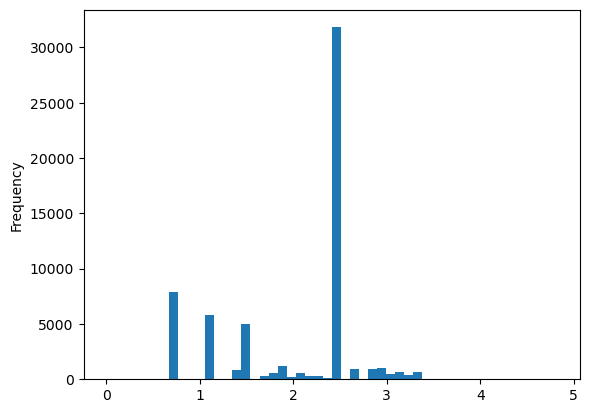

In [8]:
rs.df.peso.plot.hist(bins=50)

In [9]:
rs.entrenar_modelo(valid_pct=0.2)

epoch,train_loss,valid_loss,mae,time
0,0.465621,0.423053,0.446210,00:03
1,0.320393,0.358471,0.402380,00:03
2,0.194788,0.356560,0.418657,00:03
3,0.101083,0.347066,0.396576,00:03
4,0.057824,0.348250,0.401124,00:03


In [9]:
rs.entrenar_modelo(valid_pct=0)

epoch,train_loss,valid_loss,mae,time
0,0.415234,None,None,00:03
1,0.304831,None,None,00:03
2,0.208392,None,None,00:03
3,0.123913,None,None,00:03
4,0.067124,None,None,00:03


/home/javi/.local/lib/python3.10/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/home/javi/.local/lib/python3.10/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/home/javi/.local/lib/python3.10/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/home/javi/.local/lib/python3.10/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/home/javi/.local/lib/python3.10/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


## Guardar modelo

In [10]:
import pickle 

In [11]:
rs.trained

1

In [12]:
pickle.dump(rs, open("recomendador_comp15", 'wb') ) # Guardarlo a archivo
del rs                                              # Borrarlo (opcional)
rs = pickle.load(open("recomendador_comp15", 'rb')) # Cargarlo de archivo

In [13]:
rs.trained

1

### Ver id usuarios

In [14]:
rs.users[:10]

(#10) ['#na#',21724,21726,21728,21730,21731,21732,21733,21734,21735]

### Ver id porductos

In [15]:
rs.items[:10]

(#10) ['#na#',28863,28864,28865,28866,28867,28868,28869,28870,28872]

# <center> USUARIO(S) --> PRODUCTOS

### Sugerencias (ids de producto) para un usario concreto.

In [19]:
rs.sugerirProdutos(user_ids=[21726], limit=0.3)

(#6) [29119,28960,35032,29095,28939,28966]

### Sugerencias (ids de producto) para ciertos usarios filtrados.
- Si se proponcionan varios IDs de usuarios, el emebeding quiery usuario es la **media de todos los embedding de usuarios** individuales

In [20]:
rs.sugerirProdutos(user_ids=[21726,21728], limit=0.3)

(#3) [28970,29100,28878]

# <center> PRODUCTO(S) --> USUARIOS

### Audiencia (ids de usuarios) para un producto concreto.

In [18]:
rs.adienciaUsuaros(item_ids=[28863], limit=0.88)

(#4) [170600,123514,144080,174574]

### Audiencia (ids de usuarios) para ciertos productos filtrados.
- Si se proponcionan varios IDs de producto, el emebeding producto es la **media de todos los embedding de productos** individuales

In [22]:
rs.adienciaUsuaros(item_ids=[28863,28864,28865], limit=0.1)

(#406) [72840,73764,35447,39321,30985,24239,43209,537481,39069,28757...]

# <center> PRODUCTO(S) --> PRODUCTOS

### Ids de producto que normalmente se compran junto a este producto.

In [23]:
rs.productos_parecidos(item_ids=[28863], limit=0.3)

(#48) [28863,29111,29315,28979,28878,29113,57570,70253,29124,28985...]

# <center> USUARIO(S) + PRODUCTO(S) --> PRODUCTOS

### Ids de producto para una pareja de usuario+producto concreto.
- Nótese que **el ebedding query es la suma ponderada de 50% del emebeding usuario más 50% del emebeding producto**.
- Si se proponcionan varios IDs de usuarios, el emebeding usuario es la **media de todos los embedding de usuarios** individuales
- Si se proponcionan varios IDs de producto, el emebeding producto es la **media de todos los embedding de productos** individuales

In [26]:
rs.sugerir_productos_a_pareja_user_prod(user_ids=[21726], item_ids=[28863], limit=0.3)

(#7) [28863,29111,28985,28878,29315,28979,28970]

In [29]:
rs.sugerir_productos_a_pareja_user_prod(user_ids=[21726,21728], item_ids=[28863,28864,28865], limit=0.1)

(#29) [29133,29100,28878,28875,29111,52001,28970,28909,28863,29136...]

---
# <center> Train with SGD from scratch

In [6]:
from recommenderSystem import RecSys

In [7]:
rs2 = RecSys(pairs, users, items, userName="customer_id", itemName="product_id", scoreName="peso")

In [8]:
#rs2.draw_matrix()

In [13]:
split_idx = int(len(rs2.samples) * 0.8)
#np.random.shuffle(self.samples)
train_samples = rs2.samples[:split_idx]
valid_samples = rs2.samples[split_idx:]

train_log = rs2.entrenar_modelo_manualmente(
    train_samples = train_samples,
    valid_samples = valid_samples,
    embSize = 50,
    lr = 0.01,
    wd = 0.1,
    epochs=50)

Epoch: 1 ; trMAE = 0.4696 trMSE = 0.3812 valMAE = 0.6952 valMSE = 0.6443
Epoch: 2 ; trMAE = 0.4499 trMSE = 0.3597 valMAE = 0.6855 valMSE = 0.6276
Epoch: 3 ; trMAE = 0.4365 trMSE = 0.3446 valMAE = 0.6791 valMSE = 0.6153
Epoch: 4 ; trMAE = 0.4268 trMSE = 0.3329 valMAE = 0.6724 valMSE = 0.6041
Epoch: 5 ; trMAE = 0.4156 trMSE = 0.3218 valMAE = 0.6663 valMSE = 0.5941
Epoch: 6 ; trMAE = 0.4080 trMSE = 0.3130 valMAE = 0.6603 valMSE = 0.5854
Epoch: 7 ; trMAE = 0.4019 trMSE = 0.3044 valMAE = 0.6575 valMSE = 0.5791
Epoch: 8 ; trMAE = 0.3980 trMSE = 0.2973 valMAE = 0.6523 valMSE = 0.5717
Epoch: 9 ; trMAE = 0.3878 trMSE = 0.2902 valMAE = 0.6477 valMSE = 0.5659
Epoch: 10 ; trMAE = 0.3859 trMSE = 0.2847 valMAE = 0.6454 valMSE = 0.5616
Epoch: 11 ; trMAE = 0.3815 trMSE = 0.2791 valMAE = 0.6408 valMSE = 0.5556
Epoch: 12 ; trMAE = 0.3753 trMSE = 0.2734 valMAE = 0.6390 valMSE = 0.5526
Epoch: 13 ; trMAE = 0.3732 trMSE = 0.2689 valMAE = 0.6370 valMSE = 0.5494
Epoch: 14 ; trMAE = 0.3699 trMSE = 0.2643 valMA

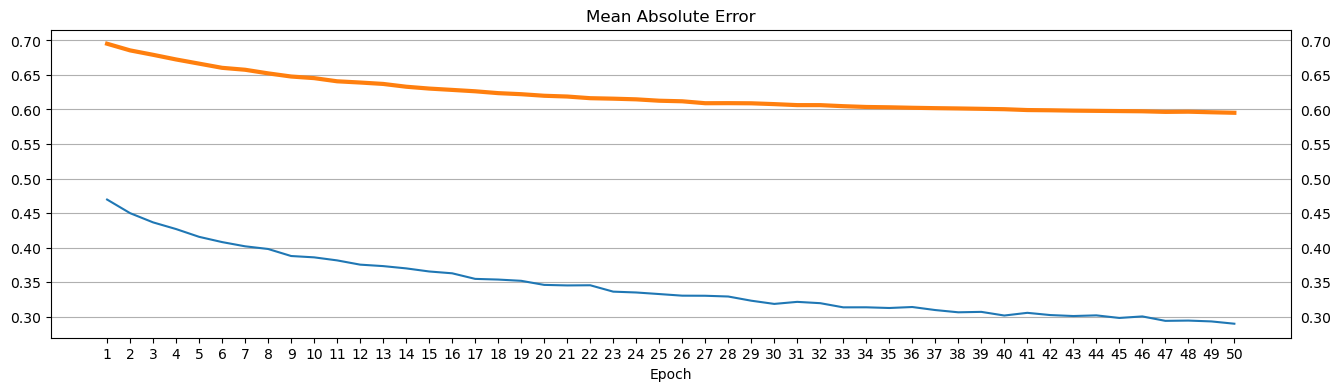

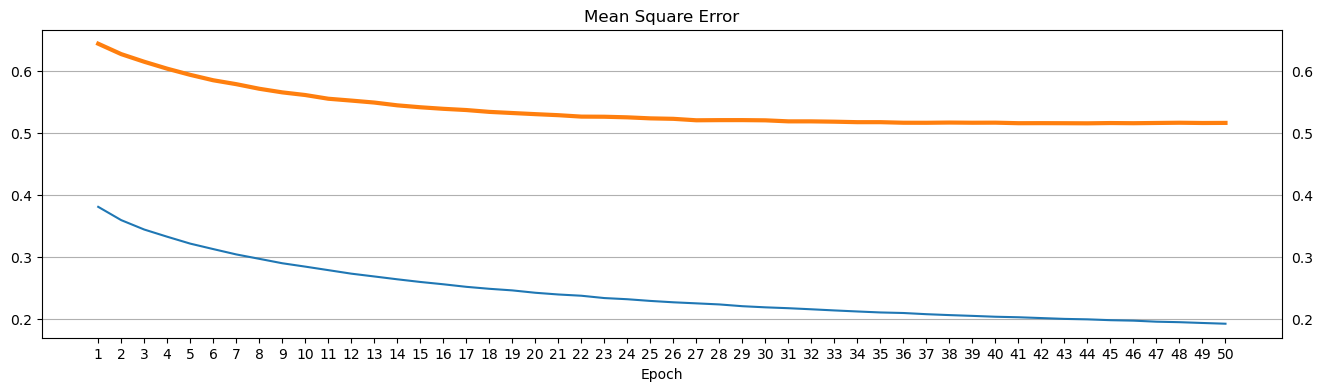

In [16]:
rs2.plot_training(train_log)

In [9]:
train_log = rs2.entrenar_modelo_manualmente(
    train_samples = rs2.samples,
    valid_samples = None,
    embSize = 50,
    lr = 0.01,
    wd = 0.1,
    epochs=50)

Epoch: 1 ; trMAE = 1.0204 trMSE = 1.8226
Epoch: 2 ; trMAE = 0.9610 trMSE = 1.7002
Epoch: 3 ; trMAE = 0.9175 trMSE = 1.6166
Epoch: 4 ; trMAE = 0.8900 trMSE = 1.5447
Epoch: 5 ; trMAE = 0.8786 trMSE = 1.4496
Epoch: 6 ; trMAE = 0.8472 trMSE = 1.3236
Epoch: 7 ; trMAE = 0.8298 trMSE = 1.2509
Epoch: 8 ; trMAE = 0.8101 trMSE = 1.2074
Epoch: 9 ; trMAE = 0.8006 trMSE = 1.1773
Epoch: 10 ; trMAE = 0.7799 trMSE = 1.1403
Epoch: 11 ; trMAE = 0.7709 trMSE = 1.1054
Epoch: 12 ; trMAE = 0.7565 trMSE = 1.0706
Epoch: 13 ; trMAE = 0.7488 trMSE = 1.0341
Epoch: 14 ; trMAE = 0.7210 trMSE = 0.9806
Epoch: 15 ; trMAE = 0.7117 trMSE = 0.9762
Epoch: 16 ; trMAE = 0.6944 trMSE = 0.9233
Epoch: 17 ; trMAE = 0.6854 trMSE = 0.8989
Epoch: 18 ; trMAE = 0.6728 trMSE = 0.8704
Epoch: 19 ; trMAE = 0.6616 trMSE = 0.8405
Epoch: 20 ; trMAE = 0.6452 trMSE = 0.8129
Epoch: 21 ; trMAE = 0.6322 trMSE = 0.7893
Epoch: 22 ; trMAE = 0.6204 trMSE = 0.7556
Epoch: 23 ; trMAE = 0.6034 trMSE = 0.7245
Epoch: 24 ; trMAE = 0.5946 trMSE = 0.7041
E

### Sugerencias (ids de producto) para un usario concreto.

In [9]:
rs2.sugerirProds_a_usuarioConcreto(user_id=21726, limit=0.3)

array([113234,  74810,  35042,  53746,  74737,  29012,  29336,  28949,
        28915,  28978,  29097,  29066,  29122,  28968,  74714,  36419,
        35033,  28988,  35029,  35062,  28947,  29065,  28970,  29078,
        28975,  29000,  28946,  29070,  29137,  35289,  28998])

### Sugerencias (ids de producto) para ciertos usarios filtrados.

In [11]:
rs2.sugerirProds_a_usuariosFiltrados(user_ids=[21726,21728], limit=0.3)

array([ 35064,  28968,  29141,  53746, 113234,  29336,  29122,  28949,
        28978,  28906,  28946,  28970,  29130,  29000,  28915,  36419,
        28947,  74810,  28913,  29012,  29002,  28988,  39208,  35033,
        55963,  28983,  28981,  74737,  28975, 113233,  74760,  29366,
        35075,  29128,  29137,  74761,  35293,  28912,  35029,  35042,
        29001,  29225,  28887,  28884,  28942])

### Audiencia (ids de usuarios) para un producto concreto.

In [14]:
rs2.adienciaUsuaros_de_productoConcreto(item_id=28863, limit=0.4)

array([148858,  97439,  29183,  22785,  31569,  52531,  28336,  49553,
       533329, 220041, 538277,  55325,  76677,  49982, 165813, 307269,
        23817, 530579,  43881,  28428, 146129, 155104, 534166,  47450,
        23087,  38759, 536407,  44090,  28460,  77186,  36305, 156327,
       145451,  30191,  38673,  29776,  75381,  42714, 161425, 536403,
       534216, 152993,  41927,  32182])

### Audiencia (ids de usuarios) para ciertos productos filtrados.

In [17]:
rs2.adienciaUsuaros_de_productosFiltrados(item_ids=[28863,28864,28865], limit=0.4)

array([ 26047, 171353,  60168,  33475,  47404, 537403,  57779,  72097,
        54120,  28428, 161711,  60202,  76685,  76184,  58778, 538353,
       142999,  49781, 153434,  47289, 150548,  45057,  27133,  47436,
        28285,  43455,  46113, 155350,  54406,  44147, 144197,  26013,
       283727,  98371,  31756, 231433,  99665,  58544,  50139, 169059,
       163217,  28920,  27483,  30326,  26437,  51453,  26062,  59487,
       398570,  28039,  71620,  58977,  22750, 149815,  24292, 159502,
        24429,  44197, 156634, 145451,  77130,  73437,  76677,  25319,
       171563, 323520, 220041,  42046,  43916,  22719, 150870,  25267,
        41035,  73893,  37037, 147617,  50518, 383138,  77215,  36431,
        25485,  27452, 195787,  30932,  27222, 536403,  30479])

### Ids de producto que normalmente se compran junto a este producto.

In [18]:
rs2.productos_parecidos(item_id=28863, limit=0.3)

array([28863, 29044, 36467, 56581, 29107, 39228, 35067])